In [60]:
import pandas as pd
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

In [61]:
df

,course_name,duration
0,Data Science,2
1,Machine Learning,3
2,Big Data,6
3,Data Engineer,4


In [62]:
df.loc[1]


,1
course_name,Machine Learning
duration,3


In [63]:
#Use loc when you're selecting data by row/column labels (names).
#Use iloc when you're selecting data by row/column integer positions

In [66]:
new_index = [3,0,1,2]
new_df = df.reindex(index=new_index)
print(new_df)

        course_name  duration
3     Data Engineer         4
0      Data Science         2
1  Machine Learning         3
2          Big Data         6


In [67]:
new_df.loc[2]

,2
course_name,Big Data
duration,6


In [69]:
new_df.iloc[2]

,1
course_name,Machine Learning
duration,3


In [70]:
#.iloc checks for integer position like 0,1,2 and so on whereas .loc we are selecting data by row/column names

In [71]:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

In [72]:
df1

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.210216,0.417271,0.856364,0.569246,0.835818,0.782331
2,0.153559,0.215963,0.568869,0.665531,0.882860,0.856832
3,0.982517,0.564173,0.639898,0.131012,0.057868,0.215052
4,0.405108,0.656598,0.195578,0.911552,0.672664,0.101038
5,0.960988,0.434782,0.932031,0.813186,0.126069,0.238014
6,0.627141,0.255267,0.857740,0.974097,0.790458,0.496916


In [75]:
df1.mean()

,0
column_1,0.556588
column_2,0.424009
column_3,0.675080
column_4,0.677437
column_5,0.560956
column_6,0.448364


In [77]:
df1['column_2'].std()

0.17068225815361043

In [81]:
df1.loc[2, 'column_2'] = 'string_value'


In [84]:
df1['column_2'].mean()

#error occurs because we cannot get mean if there is string value present

TypeError: can only concatenate str (not "float") to str

In [85]:
#Window function are like selecting a subset of rows and performing various operations
#types include rolling window,expanding,exponential window

In [90]:
current_date = pd.to_datetime("now")
current_month = current_date.strftime("%B")
current_year = current_date.year
print(current_month,current_year)

October 2024


In [92]:
import pandas as pd

def calculate_date_difference():
    date1_input = input("Enter the first date (YYYY-MM-DD): ")
    date2_input = input("Enter the second date (YYYY-MM-DD): ")
    date1 = pd.to_datetime(date1_input)
    date2 = pd.to_datetime(date2_input)

    difference = date2 - date1

    total_days = difference.days
    total_seconds = difference.total_seconds()
    hours, remainder = divmod(total_seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    print(f"Difference: {total_days} days, {int(hours)} hours, {int(minutes)} minutes")

calculate_date_difference()


Enter the first date (YYYY-MM-DD): 2022-08-01
Enter the second date (YYYY-MM-DD): 2024-10-18
Difference: 809 days, 19416 hours, 0 minutes


In [93]:
import pandas as pd

def convert_to_categorical_and_sort():
    file_path = input("Enter the CSV file path: ")

    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print("Error: The specified file was not found.")
        return
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
        return
    except pd.errors.ParserError:
        print("Error: There was a problem parsing the file.")
        return

    # Display the columns in the DataFrame
    print("Available columns:")
    print(df.columns.tolist())

    # Prompt the user for the column name
    column_name = input("Enter the column name to convert to categorical: ")

    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print("Error: The specified column does not exist in the DataFrame.")
        return

    # Prompt the user for the category order
    category_order_input = input("Enter the category order (comma-separated): ")
    category_order = [cat.strip() for cat in category_order_input.split(",")]

    # Convert the specified column to a categorical data type with the given order
    df[column_name] = pd.Categorical(df[column_name], categories=category_order, ordered=True)

    # Sort the DataFrame based on the categorical column
    sorted_df = df.sort_values(by=column_name)

    # Display the sorted DataFrame
    print("\nSorted Data:")
    print(sorted_df)


convert_to_categorical_and_sort()


Enter the CSV file path: try
Error: The specified file was not found.


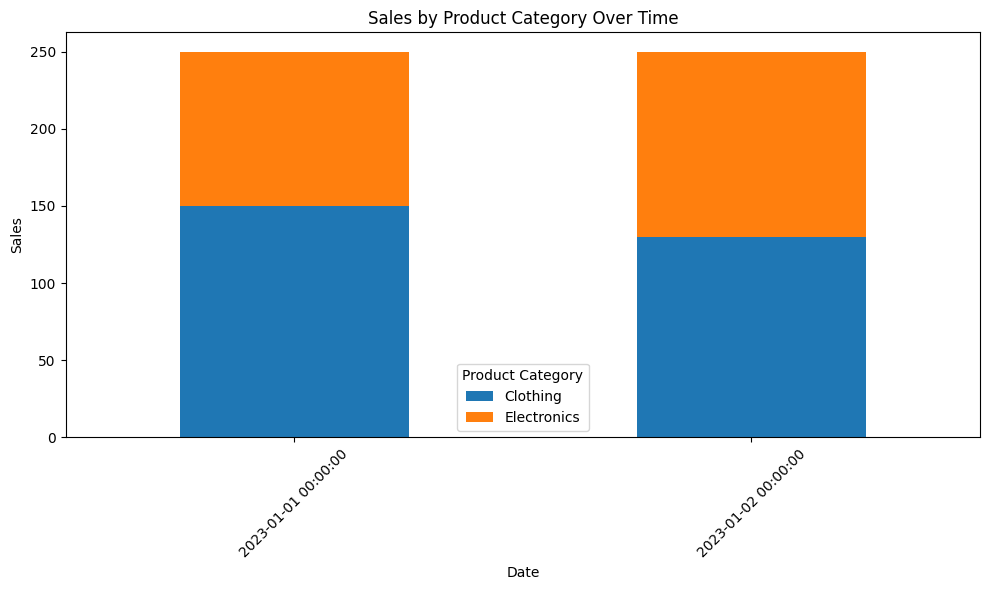

In [101]:


def visualize_sales_data(df=None):
    # If no DataFrame is provided, prompt the user for the file path
    if df is None:
        file_path = input("Enter the CSV file path: ")

        # Read the CSV file into a DataFrame
        try:
            df = pd.read_csv(file_path)
        except FileNotFoundError:
            print("Error: The specified file was not found.")
            return
        except pd.errors.EmptyDataError:
            print("Error: The file is empty.")
            return
        except pd.errors.ParserError:
            print("Error: There was a problem parsing the file.")
            return

    # Ensure the 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Pivot the DataFrame to get dates as index and product categories as columns
    pivot_df = df.pivot_table(index='Date', columns='Product Category', values='Sales', aggfunc='sum', fill_value=0)

    # Plot the stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Sales by Product Category Over Time')
    plt.xticks(rotation=45)
    plt.legend(title='Product Category')

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

# Example usage
# Create a sample DataFrame for testing
sample_data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Product Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'Sales': [100, 150, 120, 130]
}
df = pd.DataFrame(sample_data)

# Call the function with the sample DataFrame
visualize_sales_data(df)


In [ ]:
import pandas as pd
from scipy import stats

def calculate_scores_statistics():
    # Prompt the user for the file path
    file_path = input("Enter the CSV file path: ")

    # Read the CSV file into a DataFrame
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print("Error: The specified file was not found.")
        return
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
        return
    except pd.errors.ParserError:
        print("Error: There was a problem parsing the file.")
        return

    # Check if the necessary columns exist
    if 'Test Score' not in df.columns:
        print("Error: The 'Test Score' column is missing from the CSV file.")
        return

    # Calculate mean, median, and mode of test scores
    mean_score = df['Test Score'].mean()
    median_score = df['Test Score'].median()
    mode_score = stats.mode(df['Test Score'])[0][0]  # Get the mode value

    # Create a results DataFrame
    results = pd.DataFrame({
        'Statistic': ['Mean', 'Median', 'Mode'],
        'Score': [mean_score, median_score, mode_score]
    })

    # Display the results
    print("\nStatistics of Test Scores:")
    print(results)

# Run the program
calculate_scores_statistics()
